<a href="https://colab.research.google.com/github/CBelleLopez/CSE151A_Proj/blob/main/KMeans_Cluster_Model_Project_WriteUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("hf://datasets/julien-c/titanic-survival/titanic.csv")

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
data = data.drop(["Name"], axis=1)

In [7]:
data['Sex']=data['Sex'].map({'male':0,'female':1})

In [8]:
from sklearn.cluster import KMeans
X = data.drop(['Pclass','Fare'], axis=1)
y = data['Pclass']
X = data['Family_Size']= data['Siblings/Spouses Aboard'] + data['Parents/Children Aboard'] + 1
X = data.drop(columns = ['Siblings/Spouses Aboard', 'Parents/Children Aboard'])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
X.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Survived,Pclass,Sex,Age,Fare,Family_Size
0,0,3,0,22.0,7.2500,2
1,1,1,1,38.0,71.2833,2
2,1,3,1,26.0,7.9250,1
3,1,1,1,35.0,53.1000,2
4,0,3,0,35.0,8.0500,1


In [9]:
length = range(X.shape[0])
for i in length:
  X.Fare[i] = X.Fare[i]/X.Family_Size[i]
X.head()

<ipython-input-9-8c3fa042f307>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Fare[i] = X.Fare[i]/X.Family_Size[i]
<ipython-input-9-8c3fa042f307>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Fare[i] = X.Fare[i]/X.Family_Size[i]
<ipython-input-9-8c3fa042f307>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Fare[i] = X.Fare[i]/X.Family_Size[i]
<ipython-input-9-8c3fa042f307>:3: SettingWithCopyWarning: 
A value is trying to be

,Survived,Pclass,Sex,Age,Fare,Family_Size
0,0,3,0,22.0,3.62500,2
1,1,1,1,38.0,35.64165,2
2,1,3,1,26.0,7.92500,1
3,1,1,1,35.0,26.55000,2
4,0,3,0,35.0,8.05000,1


In [10]:
np.array(y)
# ground 3 = 0
# ground 1 = 1
# ground 2 = 2


array([3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2,
       3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2,
       3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 3, 3,
       1, 2, 3, 3, 2, 3, 2, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 1, 2, 3,
       2, 3, 3, 1, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2,
       3, 3, 1, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1, 2, 3, 1, 1, 3, 2,
       3, 3, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3,

In [11]:
kmeans.labels_
labels_ = kmeans.labels_
labels_ = pd.Series(labels_).map({0:3,1:1,2:2})

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, labels_)
print(mse)

1.1713641488162345


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
labels_ = kmeans.predict(X_test)
labels_ = pd.Series(labels_).map({0:3,1:1,2:2})
mse = mean_squared_error(y_test, labels_)
print(mse)


1.1853932584269662


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
labels_train = kmeans.predict(X_train)
labels_train = pd.Series(labels_train).map({0:3,1:1,2:2})
mse_train = mean_squared_error(y_train, labels_train)
print("Train MSE:", mse_train)
labels_test = kmeans.predict(X_test)
labels_test = pd.Series(labels_test).map({0:3,1:1,2:2})
mse_test = mean_squared_error(y_test, labels_test)
print("Test MSE:", mse_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, labels_test)
print("Test Accuracy:", accuracy)
accuracy_train = accuracy_score(y_train, labels_train)
print("Train Accuracy:", accuracy_train)

Train MSE: 0.9929478138222849
Test MSE: 1.1853932584269662
Test Accuracy: 0.5224719101123596
Train Accuracy: 0.5613540197461213


In [15]:
np.array(labels_)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [16]:
labels_test

,0
0,3
1,3
2,3
3,3
4,3
5,3
6,3
7,3
8,3
9,3


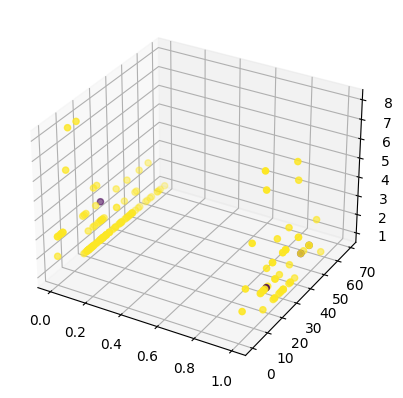

In [18]:
import mpl_toolkits.mplot3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
all_labels = kmeans.predict(X)
ax.scatter(X_test['Sex'], X_test['Age'], X_test['Family_Size'], c=labels_test)
plt.show()

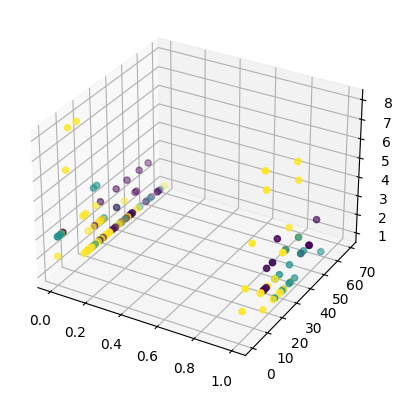

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['Sex'], X_test['Age'], X_test['Family_Size'], c=y_test) # plot ground truth
plt.show()

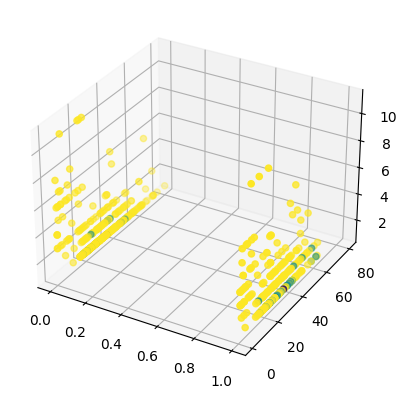

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
all_labels = kmeans.predict(X)
ax.scatter(X_train['Sex'], X_train['Age'], X_train['Family_Size'], c=labels_train)
plt.show()

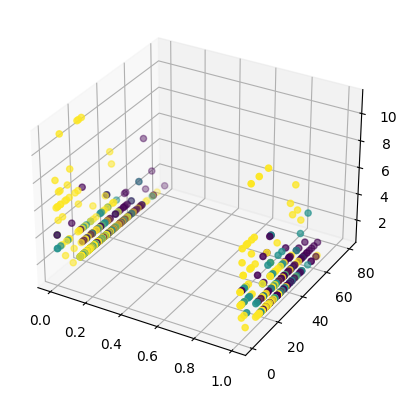

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['Sex'], X_train['Age'], X_train['Family_Size'], c=y_train) # plot ground truth
plt.show()